# Exploratory Data Analysis Marketing Campaign
Project ini bertujuan untuk melakukan EDA dan mencari insight pada dataset Marketing Campaign 



## Import Library

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime as dt

baca dataset 

In [4]:
df = pd.read_csv('marketing_campaign.csv', sep =';')

## 1. Descriptive Statistic

### Cek kesesuaian dataset

- kesesuaian nama kolom dan isi
- kesesuaian nama kolom dan tipedata
- cek missing value

In [ ]:
df.sample(5)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
1188,4088,1962,PhD,Together,31497.0,0,1,2012-12-06,22,108,...,8,0,0,0,0,0,0,3,11,0
1490,3478,1971,PhD,Married,60585.0,1,1,2013-06-24,17,267,...,5,0,0,0,0,0,0,3,11,1
57,7437,1988,Graduation,Single,27938.0,1,0,2014-04-28,31,13,...,3,0,0,0,0,0,0,3,11,0
1231,7325,1986,PhD,Together,38197.0,1,0,2013-06-29,86,23,...,5,0,0,0,0,0,0,3,11,0
1952,3434,1951,Graduation,Single,80872.0,0,0,2014-05-12,60,483,...,1,0,0,0,0,0,0,3,11,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [5]:
#cek missing value
df.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [6]:
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2240 non-null   int64         
 1   Year_Birth           2240 non-null   int64         
 2   Education            2240 non-null   object        
 3   Marital_Status       2240 non-null   object        
 4   Income               2216 non-null   float64       
 5   Kidhome              2240 non-null   int64         
 6   Teenhome             2240 non-null   int64         
 7   Dt_Customer          2240 non-null   datetime64[ns]
 8   Recency              2240 non-null   int64         
 9   MntWines             2240 non-null   int64         
 10  MntFruits            2240 non-null   int64         
 11  MntMeatProducts      2240 non-null   int64         
 12  MntFishProducts      2240 non-null   int64         
 13  MntSweetProducts     2240 non-nul

menggunakan fungsi `.info() ` dan `.sample()` diketahui bahwa:

*   terdapat 2240 baris data  
*   Terdapat 29 kolom dimana : 3 jenis kategori, 26 jenis numerik
* dilakukan perubahan tipe data pada kolom DT_Customer menjadi tipe datetime
*   Terdapat 24 nilai kosong pada kolom *income*

- nama kolom dan tipe data serta isi kolom sudah sesuai

### Melihat statistical summary dari dataset

In [7]:
#pisahkan berdasarkan dtypes

num_dtypes = ['int64','float64']
num_df = df.select_dtypes(include=num_dtypes)

numericals = num_df.columns

categoricals = ['Education', 'Marital_Status']
print(numericals)


Index(['ID', 'Year_Birth', 'Income', 'Kidhome', 'Teenhome', 'Recency',
       'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts',
       'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases',
       'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
       'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5',
       'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Z_CostContact',
       'Z_Revenue', 'Response'],
      dtype='object')


In [8]:
df[numericals].describe().T


,count,mean,std,min,25%,50%,75%,max
ID,2240.0,5592.159821,3246.662198,0.0,2828.25,5458.5,8427.75,11191.0
Year_Birth,2240.0,1968.805804,11.984069,1893.0,1959.00,1970.0,1977.00,1996.0
Income,2216.0,52247.251354,25173.076661,1730.0,35303.00,51381.5,68522.00,666666.0
Kidhome,2240.0,0.444196,0.538398,0.0,0.00,0.0,1.00,2.0
Teenhome,2240.0,0.506250,0.544538,0.0,0.00,0.0,1.00,2.0
Recency,2240.0,49.109375,28.962453,0.0,24.00,49.0,74.00,99.0
MntWines,2240.0,303.935714,336.597393,0.0,23.75,173.5,504.25,1493.0
MntFruits,2240.0,26.302232,39.773434,0.0,1.00,8.0,33.00,199.0
MntMeatProducts,2240.0,166.950000,225.715373,0.0,16.00,67.0,232.00,1725.0
MntFishProducts,2240.0,37.525446,54.628979,0.0,3.00,12.0,50.00,259.0


In [9]:
df[categoricals].describe()

,Education,Marital_Status
count,2240,2240
unique,5,8
top,Graduation,Married
freq,1127,864


In [10]:
df['Marital_Status'].value_counts()


Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64

Kesimpulan statistik menggunakan fungsi `.describe()`

- Pada kolom income data maksimal 666666, sementara 75% data hanya mencapai 68522, hal ini menandakan adanya outlier yang sangat besar. 
- Pada year-birth, terdapat data yang memiliki rentang sangat jauh dari Q1
- Z_CostContact dan Z_revenue memiliki nilai berupa konstanta ( nilai tetap) 
- Marital_Status memiliki 8 nilai unique dengan 3 nilai yang kurang sesuai (YOLO, Alone, Absurd).



## 2. Univariate Analysis

Analisis setiap kolom secara terpisah, melihat distribusi secara detail

In [11]:
len(numericals)

26

### Melihat sebaran dan pencilan menggunakan boxplot

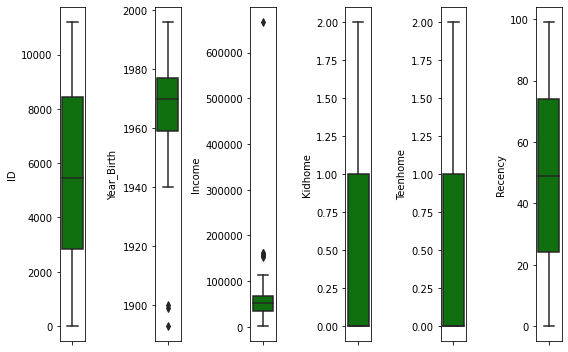

In [23]:
features = numericals[0:6]
plt.figure(figsize = (8,5))
for i in range(0, len(features)):
  plt.subplot(1, len(features), i+1)
  sns.boxplot(y=df[features[i]], color='green', orient='v')
  plt.tight_layout()


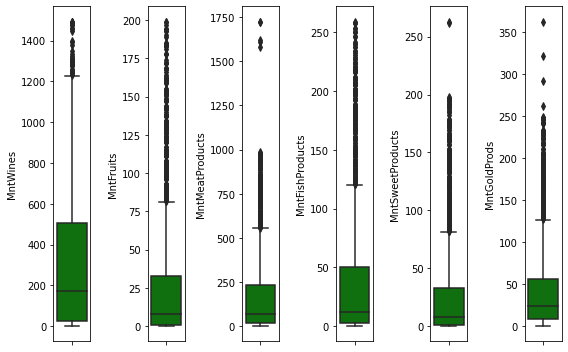

In [24]:
features = numericals[6:12]
plt.figure(figsize = (8,5))
for i in range(0, len(features)):
  plt.subplot(1, len(features), i+1)
  sns.boxplot(y=df[features[i]], color='green', orient='v')
  plt.tight_layout()

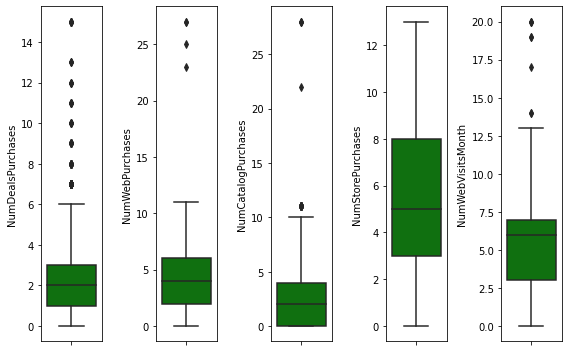

In [26]:
features = numericals[12:17]
plt.figure(figsize = (8,5))
for i in range(0, len(features)):
  plt.subplot(1, len(features), i+1)
  sns.boxplot(y=df[features[i]], color='green', orient='v')
  plt.tight_layout()

Berdasarkan tampilan boxplot :
- Data yang tidak  memiliki outlier : kidhome, teenhome, recency dan - numstorepurchase
- Outlier sangat besar : income dan year_birth
- Kolom selain itu memiliki outlier namun tidak terlalu besar


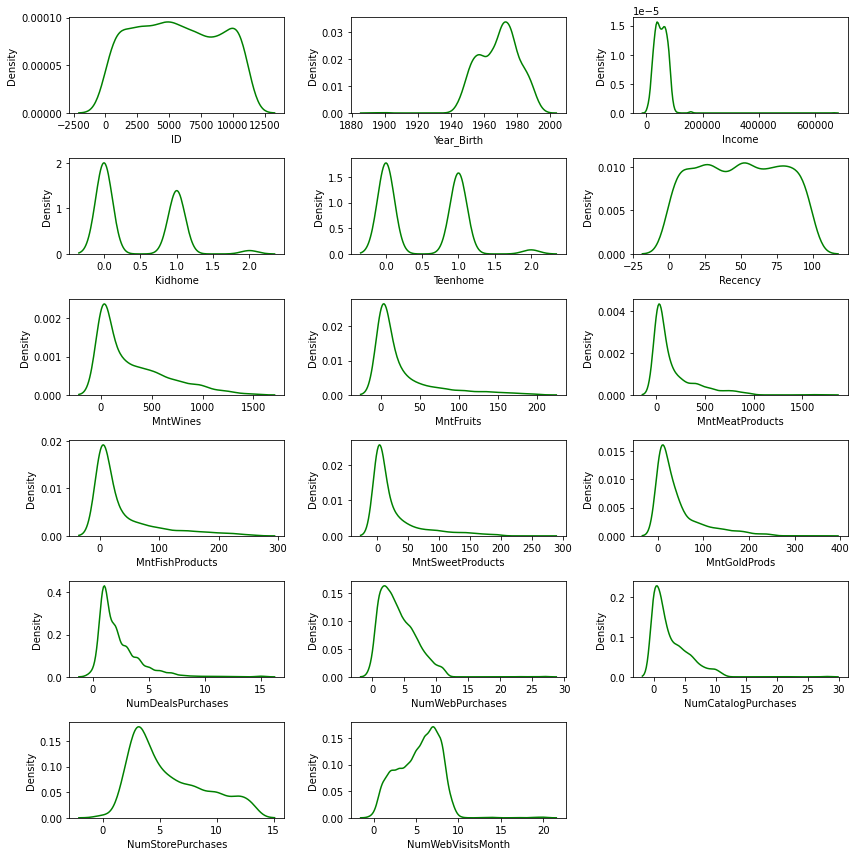

In [29]:

plt.figure(figsize= (12, 12))
features = numericals[0:17]
for i in range(0, len(features)):
  plt.subplot( 6, 3, i+1)
  sns.kdeplot(x=df[features[i]], color= 'green')
  
  plt.xlabel(features[i])
  plt.tight_layout()
  
  

Berdasarkan grafik maka sebaran data : 
- Binomial : Kidhome dan Teenhome
- Distribusi Normal : ID dan Recency
- Positive Skewed : grafik selain kidhome, teenhome, id dan recency

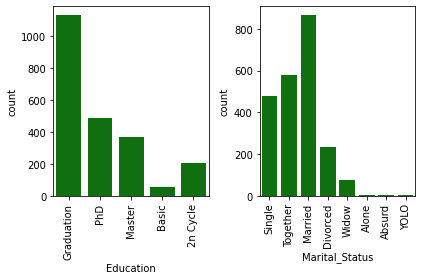

In [30]:
features = categoricals
for i in range(0, len(features)):
  plt.subplot(1, len(features), i+1)
  sns.countplot(x= df[features[i]], color = 'green')
  plt.tight_layout()
  plt.xticks( rotation = 90 )



/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


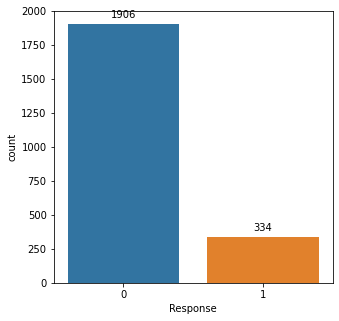

In [34]:
plt.figure(figsize=(5,5))
r_plot = sns.countplot(df.Response)

for i in r_plot.patches: 
  r_plot.annotate(format(i.get_height()), (i.get_x()+ i.get_width()/2., i.get_height()),
  ha = 'center', va= 'center',
  xytext = (0,9),
  textcoords = 'offset points')
plt.show()


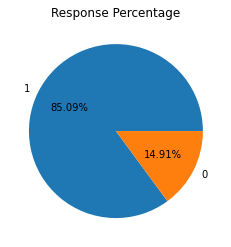

In [38]:
plt.title("Response Percentage")
respon_rate = (df.groupby('Response').size() / df['Response'].count()) *100
plt.pie(respon_rate, labels=df['Response'].unique(),autopct='%1.2f%%', data=df)
plt.show()


Target / label yang digunakan adalah Response :

Perbandingan response diterima dan tidak adalah 334 : 1906, Rasio respon yang diterima adalah 14,91%


## 3. Multivariate Analysis

### Perbandingan berbagai fitur terhadap label



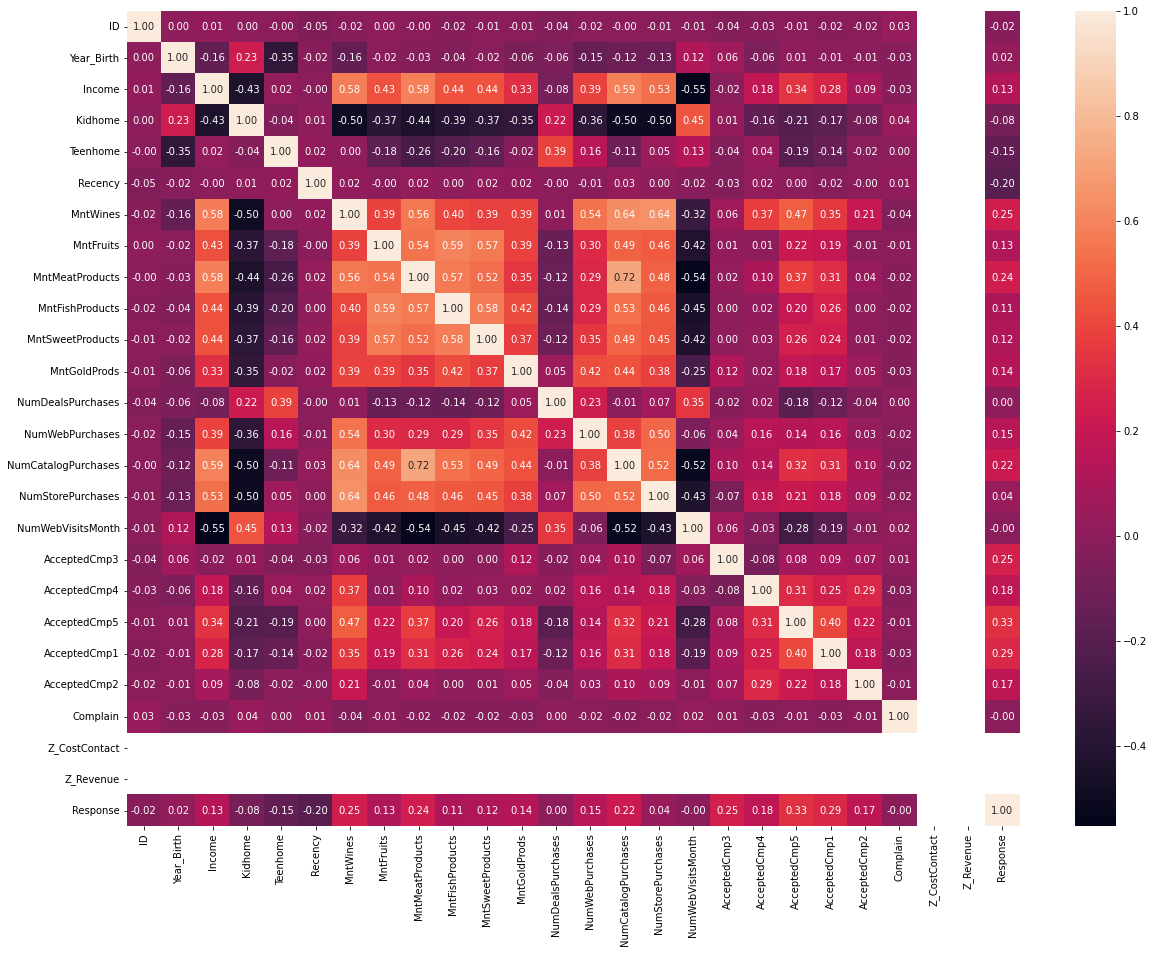

In [39]:
plt.figure(figsize= (20,15))
sns.heatmap(df.corr(), annot = True, fmt = '.2f' )


In [40]:
k = df.corr()['Response']
k.sort_values(ascending = False)

Response               1.000000
AcceptedCmp5           0.326634
AcceptedCmp1           0.293982
AcceptedCmp3           0.254258
MntWines               0.247254
MntMeatProducts        0.236335
NumCatalogPurchases    0.220810
AcceptedCmp4           0.177019
AcceptedCmp2           0.169293
NumWebPurchases        0.148730
MntGoldProds           0.139850
Income                 0.133047
MntFruits              0.125289
MntSweetProducts       0.117372
MntFishProducts        0.111331
NumStorePurchases      0.039363
Year_Birth             0.021325
NumDealsPurchases      0.002238
Complain              -0.001707
NumWebVisitsMonth     -0.003987
ID                    -0.021968
Kidhome               -0.080008
Teenhome              -0.154446
Recency               -0.198437
Z_CostContact               NaN
Z_Revenue                   NaN
Name: Response, dtype: float64

Tidak ada korelasi linear yang cukup kuat antara masing-masing feature dan target, karena nilai korelasi pada fitur dan target di bawah 0.5, sehingga feature-feature yang akan dipertahankan baru dapat diketahui setelah perhitungan feature importance


In [41]:
df["Spending"] = df["MntWines"] + df["MntMeatProducts"] + df["MntFishProducts"] + df["MntSweetProducts"] + df["MntGoldProds"]
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Spending
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,0,0,0,0,0,0,3,11,1,1529
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,0,0,0,0,0,0,3,11,0,26
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,0,0,0,0,0,0,3,11,0,727
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,0,0,0,0,0,0,3,11,0,49
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,0,0,0,0,0,0,3,11,0,379


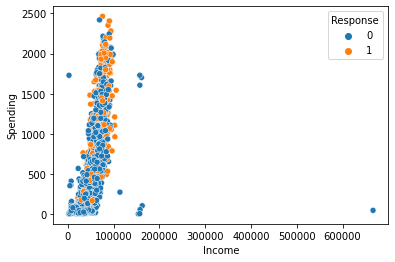

In [42]:
sns.scatterplot(x="Income",y='Spending', hue = 'Response', data=df)

Income dan Spending memiliki korelasi positif pada response, dimana semakin tinggi nilai income dan spending semakin besar tingkat respon sehingga fitur income dan spending perlu dipertahankan

In [43]:
df["Year_Customer"] = df["Dt_Customer"].apply(lambda x: x.year)
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Spending,Year_Customer
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,0,0,0,0,0,3,11,1,1529,2012
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,0,0,0,0,0,3,11,0,26,2014
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,0,0,0,0,0,3,11,0,727,2013
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,0,0,0,0,0,3,11,0,49,2014
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,0,0,0,0,0,3,11,0,379,2014


In [44]:
df3 = df.groupby(["Year_Customer","Response"])["ID"].nunique().reset_index(name = "Count")
df3

,Year_Customer,Response,Count
0,2012,0,362
1,2012,1,132
2,2013,0,1035
3,2013,1,154
4,2014,0,509
5,2014,1,48


In [45]:
# membuat dataframe baru dari year customer dengan response
df_YC = pd.pivot_table(df3,
                            index = ['Year_Customer'],
                            columns = ['Response'],
                            values = ['Count'])
df_YC = df_YC.reset_index()
df_YC.columns = ['Year_Customer', 'AResponse', 'Response']
df_YC

,Year_Customer,AResponse,Response
0,2012,362,132
1,2013,1035,154
2,2014,509,48


In [47]:
# menghitung total response dan percentage
df_YC['Total_response'] = df_YC['AResponse'] + df_YC['Response']
df_YC['Percentage']= round((df_YC['Response']/df_YC['Total_response']) * 100, 2)
df_YC

,Year_Customer,AResponse,Response,Total_response,Percentage
0,2012,362,132,494,26.72
1,2013,1035,154,1189,12.95
2,2014,509,48,557,8.62


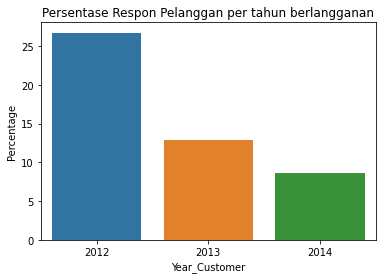

In [73]:

sns.barplot (x = 'Year_Customer', y='Percentage', data=df_YC)
plt.title("Persentase Respon Pelanggan per tahun berlangganan")
plt.show()


Customer yang  berlangganan lebih lama memiliki tingkat response yang lebih besar

In [51]:
df2 = df.groupby(["Education","Response"])["ID"].nunique().reset_index(name = "Count")
df2


,Education,Response,Count
0,2n Cycle,0,181
1,2n Cycle,1,22
2,Basic,0,52
3,Basic,1,2
4,Graduation,0,975
5,Graduation,1,152
6,Master,0,313
7,Master,1,57
8,PhD,0,385
9,PhD,1,101


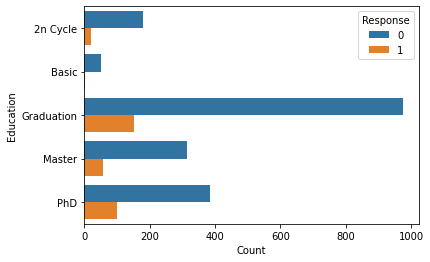

In [52]:
sns.barplot(y="Education",x="Count",hue="Response", data=df2)

In [68]:
# membuat dataframe baru dari Education dengan response
df_Education = pd.pivot_table(df2,
                            index = ['Education'],
                            columns = ['Response'],
                            values = ['Count'])
df_Education = df_Education.reset_index()
df_Education.columns = ['Education', 'AResponse', 'Response']

df_Education

,Education,AResponse,Response
0,2n Cycle,181,22
1,Basic,52,2
2,Graduation,975,152
3,Master,313,57
4,PhD,385,101


In [80]:
# menghitung total response dan percentage
df_Education['Total_Response'] = df_Education['AResponse'] + df_Education['Response']
df_Education['Percentage']= round((df_Education['Response']/df_Education['Total_Response'] * 100),2)
df_ER = df_Education.sort_values(by = ['Percentage'] , ascending = True)
df_ER

,Education,AResponse,Response,Total_Response,Percentage
1,Basic,52,2,54,3.70
0,2n Cycle,181,22,203,10.84
2,Graduation,975,152,1127,13.49
3,Master,313,57,370,15.41
4,PhD,385,101,486,20.78


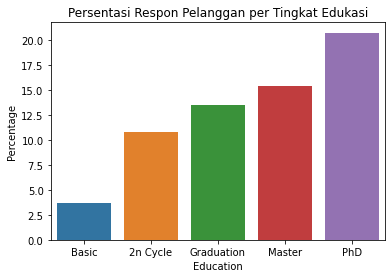

In [81]:
sns.barplot (x = 'Education', y='Percentage', data=df_ER)
plt.title("Persentasi Respon Pelanggan per Tingkat Edukasi")
plt.show()


Customer dengan tingkat pendidikan lebih tinggi memiliki tingkat response yang lebih besar.


In [136]:
dfm=  df.groupby(["Marital_Status","Response"])["ID"].nunique().reset_index(name = "Count")

df_marital = pd.pivot_table(dfm,
                            index = ['Marital_Status'],
                            columns = ['Response'],
                            values = ['Count'])
df_marital = df_marital.reset_index()
df_marital.columns = ['Marital_Status', 'AResponse', 'Response']
df_marital['Total_Response'] = df_marital['AResponse'] + df_marital['Response']
df_marital['Percentage']= round((df_marital['Response']/df_marital['Total_Response'])*100, 2)
df_marital

,Marital_Status,AResponse,Response,Total_Response,Percentage
0,Absurd,1,1,2,50.00
1,Alone,2,1,3,33.33
2,Divorced,184,48,232,20.69
3,Married,766,98,864,11.34
4,Single,374,106,480,22.08
5,Together,520,60,580,10.34
6,Widow,58,19,77,24.68
7,YOLO,1,1,2,50.00


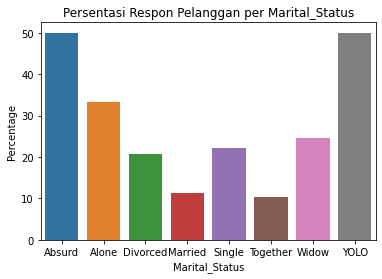

In [137]:
# membuat barplot korelasi marital status dengan percentage
sns.barplot (x = 'Marital_Status', y='Percentage', data=df_marital)
plt.title("Persentasi Respon Pelanggan per Marital_Status")
plt.show()

tidak terdapat insight 

### Perbandingan Antar Fitur

In [85]:
# Membuat Acceptance Rate dari setiap campaign

AR1 = (df['AcceptedCmp1'].sum()/2240 ) * 100
AR2 = (df['AcceptedCmp2'].sum()/2240 ) * 100
AR3 = (df['AcceptedCmp3'].sum()/2240 ) * 100
AR4 = (df['AcceptedCmp4'].sum()/2240 ) * 100
AR5 = (df['AcceptedCmp5'].sum()/2240 ) * 100

print(AR1,AR2,AR3,AR4,AR5)

6.428571428571428 1.3392857142857142 7.276785714285714 7.455357142857142 7.276785714285714


In [91]:
# membuat dataframe baru berisi campaign dan acceptance ratenya
ACC = pd.DataFrame({'Campaign': ['1', '2', '3', '4', '5'], 'Acceptance_percentage': [AR1, AR2, AR3, AR4, AR5]})
ACC

,Campaign,Acceptance_percentage
0,1,6.428571
1,2,1.339286
2,3,7.276786
3,4,7.455357
4,5,7.276786


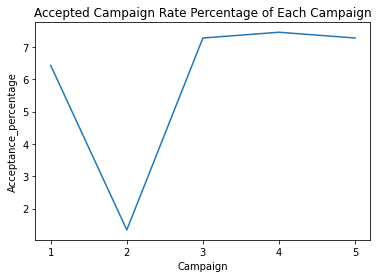

In [93]:
# Lineplot terkait Acceptance Rate
sns.lineplot(data=ACC, x="Campaign", y="Acceptance_percentage")
plt.title ( "Accepted Campaign Rate Percentage of Each Campaign")
plt.show()

Setelah membandingkan  setiap accepted campaign, terdapat perubahan drastis dari campaign 1 ke campaign 3, akan tetapi hal ini belum memberikan informasi lebih jauh terkait campaign yang dilakukan

## Next

### to be discussed further

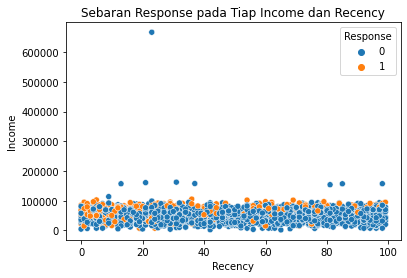

In [95]:
sns.scatterplot(x="Recency",y="Income",hue="Response", data=df)
plt.title('Sebaran Response pada Tiap Income dan Recency')
plt.show()

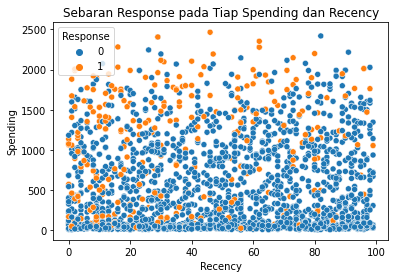

In [96]:
sns.scatterplot(x="Recency",y="Spending",hue="Response", data=df)
plt.title('Sebaran Response pada Tiap Spending dan Recency')
plt.show()

In [105]:
df4 = df.groupby(["NumDealsPurchases","Response"])["ID"].nunique().reset_index(name = "Count")
df4

,NumDealsPurchases,Response,Count
0,0,0,30
1,0,1,16
2,1,0,810
3,1,1,160
4,2,0,449
5,2,1,48
6,3,0,259
7,3,1,38
8,4,0,163
9,4,1,26


In [114]:
df_deals = pd.pivot_table(df4,
                          index = ['NumDealsPurchases'],
                          columns = ['Response'],
                          values = ['Count'] )
df_deals = df_deals.reset_index()
df_deals.columns = ['NumDeals', 'AResponse', 'Response']

df_deals['Percentage'] = round((df_deals['Response'] / (df_deals['AResponse'] + df_deals['Response'] )*100),2)

df_deals

,NumDeals,AResponse,Response,Percentage
0,0,30.0,16.0,34.78
1,1,810.0,160.0,16.49
2,2,449.0,48.0,9.66
3,3,259.0,38.0,12.79
4,4,163.0,26.0,13.76
5,5,78.0,16.0,17.02
6,6,49.0,12.0,19.67
7,7,32.0,8.0,20.00
8,8,13.0,1.0,7.14
9,9,5.0,3.0,37.50


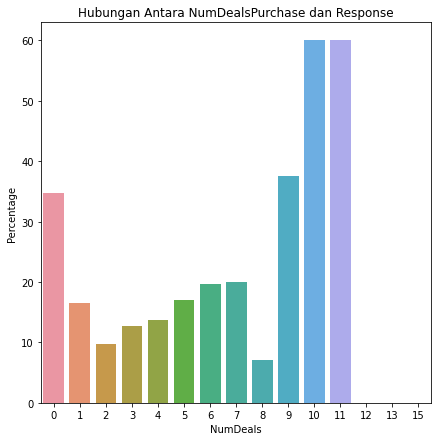

In [115]:
plt.figure(figsize = (7,7))
sns.barplot(x="NumDeals",y="Percentage", data=df_deals)
plt.title('Hubungan Antara NumDealsPurchase dan Response')
plt.show()

Terdapat kecenderungan kenaikan tingkat respon terhadap kenaikan Pembelian dengan diskon

In [116]:
df5 = df.groupby(["NumWebPurchases","Response"])["ID"].nunique().reset_index(name = "Count")

df_web = pd.pivot_table(df5,
                          index = ['NumWebPurchases'],
                          columns = ['Response'],
                          values = ['Count'] )s.barplot(x="NumStore",y="Percentage", data=df_st)

plt.title(
df_web = df_web.reset_index()
df_web.columns = ['NumWeb', 'AResponse', 'Response']

df_web['Percentage'] = round((df_web['Response'] / (df_web['AResponse'] + df_web['Response'] )*100),2)

df_web

,NumWeb,AResponse,Response,Percentage
0,0,48.0,1.0,2.04
1,1,333.0,21.0,5.93
2,2,343.0,30.0,8.04
3,3,282.0,54.0,16.07
4,4,238.0,42.0,15.00
5,5,162.0,58.0,26.36
6,6,176.0,29.0,14.15
7,7,110.0,45.0,29.03
8,8,85.0,17.0,16.67
9,9,61.0,14.0,18.67


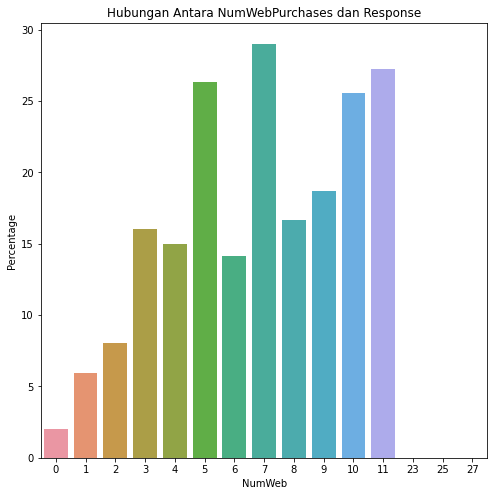

In [119]:
plt.figure(figsize = (8,8))
sns.barplot(x="NumWeb",y="Percentage", data=df_web)

plt.title('Hubungan Antara NumWebPurchases dan Response')
plt.show()

tidak terdapat insight / terdapat kecendrungan kenaikan ?

In [120]:
df6 = df.groupby(["NumCatalogPurchases","Response"])["ID"].nunique().reset_index(name = "Count")

df_cat = pd.pivot_table(df6,
                          index = ['NumCatalogPurchases'],
                          columns = ['Response'],
                          values = ['Count'] )
df_cat = df_cat.reset_index()
df_cat.columns = ['NumCat', 'AResponse', 'Response']

df_cat['Percentage'] = round((df_cat['Response'] / (df_cat['AResponse'] + df_cat['Response'] )*100),2)

df_cat

,NumCat,AResponse,Response,Percentage
0,0,564.0,22.0,3.75
1,1,426.0,71.0,14.29
2,2,237.0,39.0,14.13
3,3,158.0,26.0,14.13
4,4,150.0,32.0,17.58
5,5,110.0,30.0,21.43
6,6,89.0,39.0,30.47
7,7,61.0,18.0,22.78
8,8,40.0,15.0,27.27
9,9,32.0,10.0,23.81


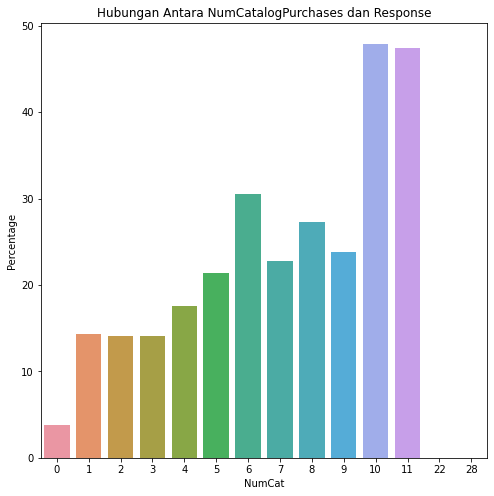

In [121]:
plt.figure(figsize = (8,8))
sns.barplot(x="NumCat",y="Percentage", data=df_cat)

plt.title('Hubungan Antara NumCatalogPurchases dan Response')
plt.show()

memiliki kecendrungan pengingkatan ? 

In [125]:
df7 = df.groupby(["NumStorePurchases","Response"])["ID"].nunique().reset_index(name = "Count")

df_st = pd.pivot_table(df7,
                          index = ['NumStorePurchases'],
                          columns = ['Response'],
                          values = ['Count'] )
df_st = df_st.reset_index()
df_st.columns = ['NumStore', 'AResponse', 'Response']

df_st['Percentage'] = round((df_st['Response'] / (df_st['AResponse'] + df_st['Response'] )*100),2)

df_st

,NumStore,AResponse,Response,Percentage
0,0,15.0,NaN,NaN
1,1,7.0,NaN,NaN
2,2,175.0,48.0,21.52
3,3,460.0,30.0,6.12
4,4,282.0,41.0,12.69
5,5,170.0,42.0,19.81
6,6,139.0,39.0,21.91
7,7,112.0,31.0,21.68
8,8,124.0,25.0,16.78
9,9,83.0,23.0,21.70


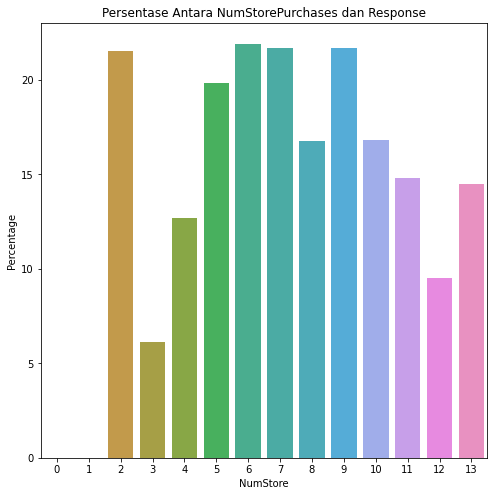

In [128]:
plt.figure(figsize = (8,8))
sns.barplot(x="NumStore",y="Percentage", data=df_st)

plt.title('Persentase Antara NumStorePurchases dan Response')
plt.show()

Tidak berhubungan

In [129]:
df8 = df.groupby(["Complain","Response"])["ID"].nunique().reset_index(name = "Count")

df_cpl = pd.pivot_table(df8,
                          index = ['Complain'],
                          columns = ['Response'],
                          values = ['Count'] )
df_cpl = df_cpl.reset_index()
df_cpl.columns = ['Complain', 'AResponse', 'Response']

df_cpl['Percentage'] = round((df_cpl['Response'] / (df_cpl['AResponse'] + df_cpl['Response'] )*100),2)

df_cpl

,Complain,AResponse,Response,Percentage
0,0,1888,331,14.92
1,1,18,3,14.29


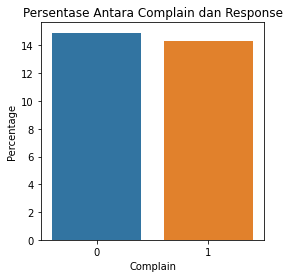

In [133]:
plt.figure(figsize = (4,4))
sns.barplot(x="Complain",y="Percentage", data=df_cpl)

plt.title('Persentase Antara Complain dan Response')
plt.show()

complain tidak mempengaruhi response

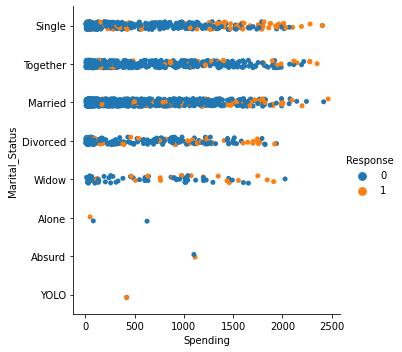

In [ ]:
sns.catplot(data=df, x='Spending', y='Marital_Status', hue = 'Response')

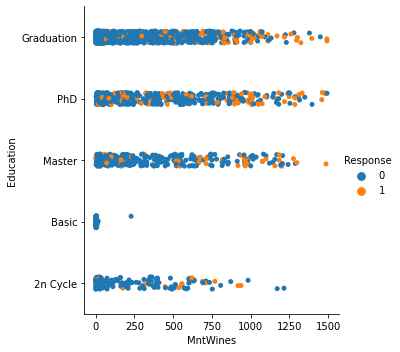

In [ ]:
sns.catplot(data=df, x='MntWines', y= 'Education', hue = 'Response')